In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- ./ai/bin/python -m pip install pandas

In [23]:
train = pd.read_csv("titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [27]:
train["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Sex'>

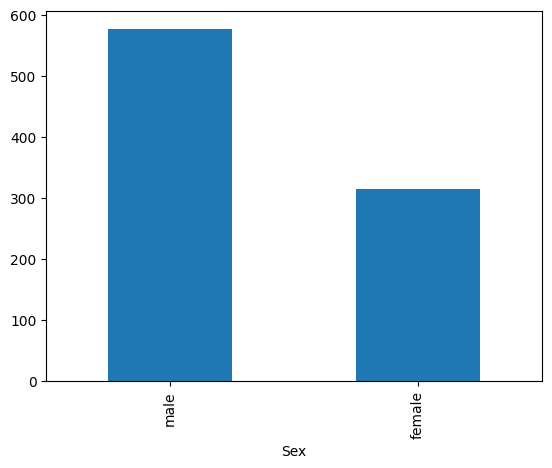

In [28]:
train["Sex"].value_counts().plot(kind="bar")

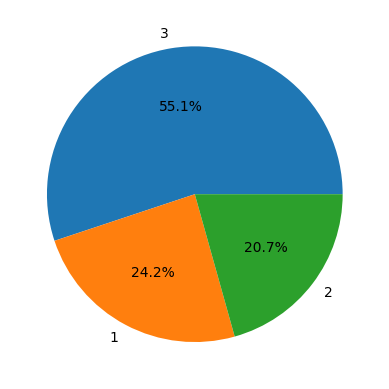

In [29]:
temp = train["Pclass"].value_counts()
plt.pie(temp, labels=temp.index, autopct="%.1f%%")
plt.show()

/var/folders/85/7s819_n161b375f1vb84mfkw0000gn/T/ipykernel_71137/1020748889.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train, palette='coolwarm')


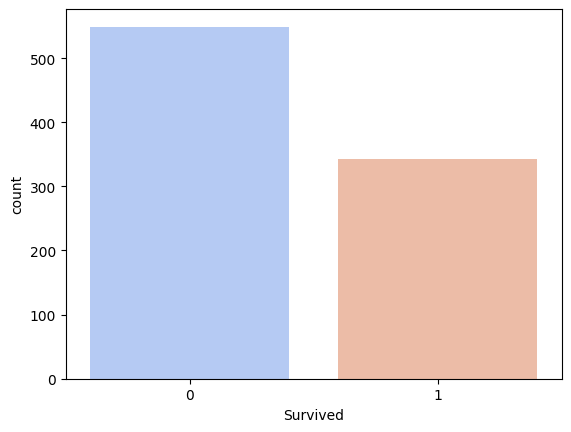

In [30]:
sns.countplot(x='Survived', data=train, palette='coolwarm')
plt.show()

/var/folders/85/7s819_n161b375f1vb84mfkw0000gn/T/ipykernel_71137/190373374.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Sex', y = 'Survived', data=train, palette='coolwarm')


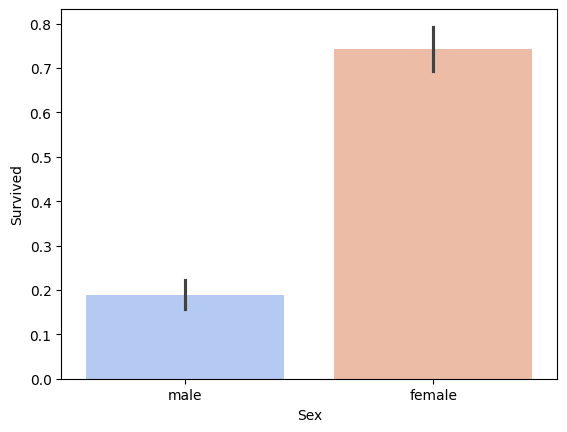

In [31]:
sns.barplot(x = 'Sex', y = 'Survived', data=train, palette='coolwarm')
plt.show()

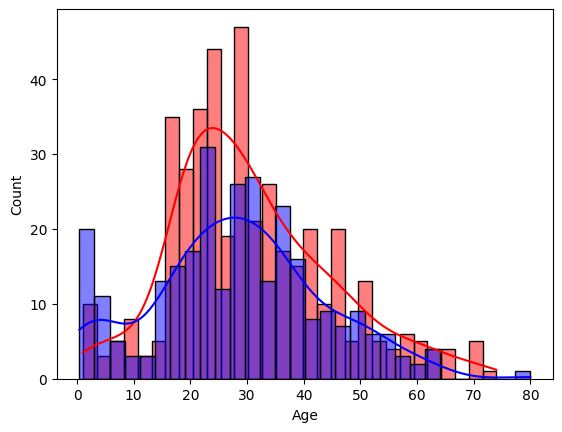

In [32]:
sns.histplot(train[train['Survived'] == 0]['Age'], bins=30, color='red', kde=True)
sns.histplot(train[train['Survived'] == 1]['Age'], bins=30, color='blue', kde=True)
plt.show()

In [35]:
train.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [37]:
train.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

In [38]:
from scipy.stats import chi2_contingency

In [41]:
table = pd.crosstab(train['Pclass'], train['Survived'])
# print(chi2_contingency(table))
stat, pvalue, dof, expected = chi2_contingency(table)
print(pvalue) # 0.05보다 작으므로 Pclass와 Survived는 통계적으로 유의미한 관계가 있다.

4.549251711298793e-23


In [ ]:
# 결측치 처리
train["Embarked"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool